## Observations and Insights 

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_num = len(mouse_metadata)
print(f"The number of mice is {mice_num}.")

The number of mice is 249.


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]

print("Duplicate Rows based on Mouse ID and Timepoint are:", duplicate_df, sep='\n')


Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

distinct_dup_mouseid = duplicate_df['Mouse ID'].unique()

print (f"The duplicate Mouse ID is {distinct_dup_mouseid[0]}.")

The duplicate Mouse ID is g989.


In [5]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.reset_index().drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first').set_index('index')
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
uniq_mice_num = clean_df['Mouse ID'].nunique()
print(f"The number of mice in the clean DataFrame is {uniq_mice_num}.")

The number of mice in the clean DataFrame is 249.


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

study_group = clean_df.groupby(["Drug Regimen"])

# print(study_group["Drug Regimen"])
# mean = study_group["Tumor Volume (mm3)"].mean()
# median = study_group["Tumor Volume (mm3)"].median()
# var = study_group["Tumor Volume (mm3)"].var()
# std = study_group["Tumor Volume (mm3)"].std()
# sem = study_group["Tumor Volume (mm3)"].sem()

# summary_stat_df1["mean"]=

summary_stat_df1=\
    clean_df.groupby("Drug Regimen").agg(
        mean=('Tumor Volume (mm3)', 'mean'),
        median=('Tumor Volume (mm3)', 'median'),
        var=('Tumor Volume (mm3)', 'var'),
        std=('Tumor Volume (mm3)', 'std'),
        sem=('Tumor Volume (mm3)', 'sem'))

summary_stat_df1



In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat_df2 =\
    clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

summary_stat_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

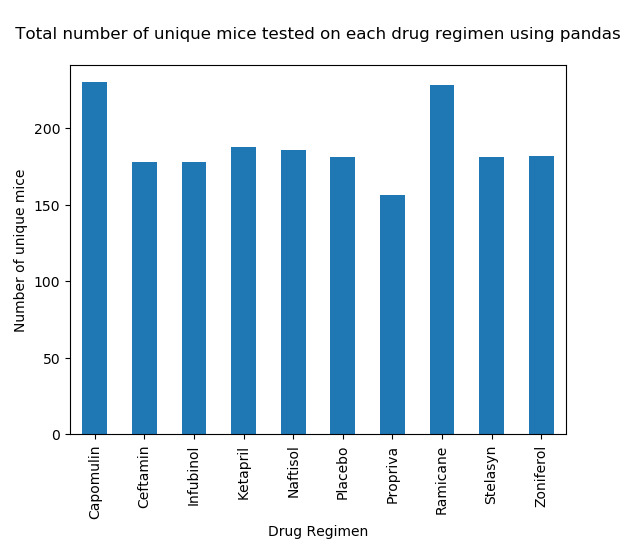

<Figure size 640x480 with 0 Axes>

In [189]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_drug_df = study_group["Mouse ID"].count()


mice_bar_chart = mice_drug_df.plot(kind='bar')
mice_bar_chart.set_xlabel("Drug Regimen")
mice_bar_chart.set_ylabel("Number of unique mice")

plt.title("\n Total number of unique mice tested on each drug regimen using pandas \n")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of unique mice')

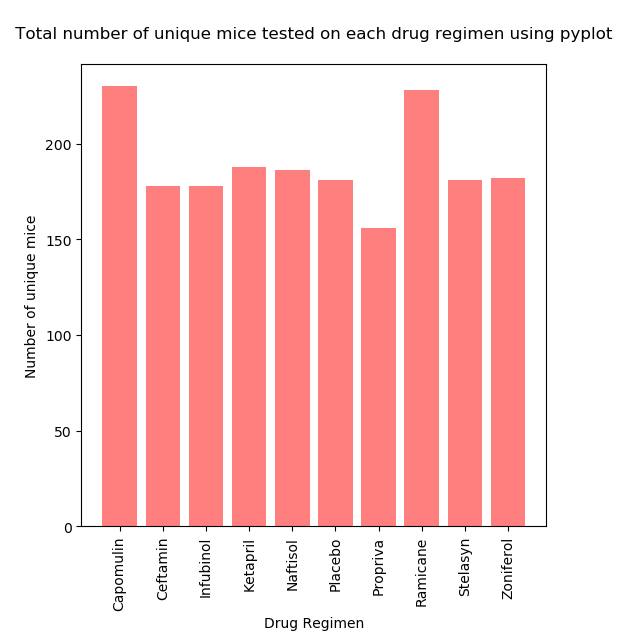

In [190]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.style.use('default')

plt.figure(figsize=(6,6))

plt.bar(mice_drug_df.index, mice_drug_df, color = 'r', alpha=0.5, align="center")

plt.title("\n Total number of unique mice tested on each drug regimen using pyplot \n")

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice")


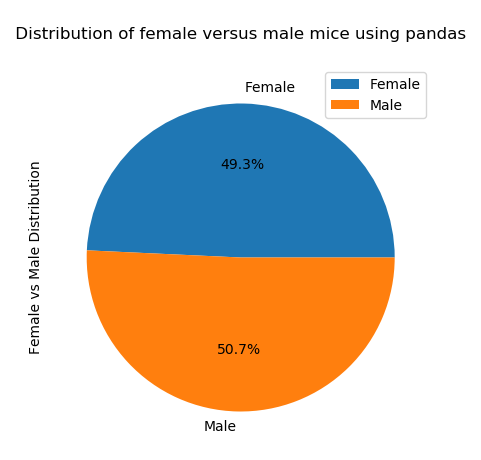

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#clean_df.head()

gender_dist = clean_df.groupby(["Sex"]).agg(Distribution=('Mouse ID', 'count'))

dist_pie = gender_dist.plot(kind="pie", y='Distribution', figsize=(5,5), autopct = '%1.1f%%',\
                            title=("\n Distribution of female versus male mice using pandas \n"))

dist_pie.set_ylabel("Female vs Male Distribution")

plt.show()


# How do I display count value on the pie

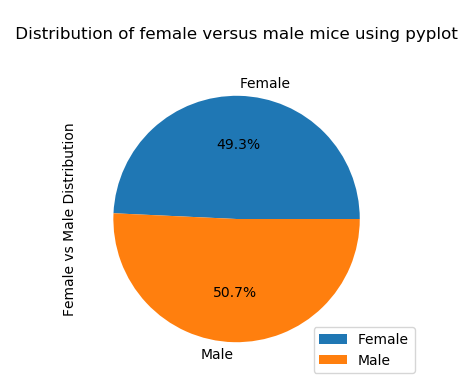

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.style.use('default')

plt.figure(figsize=(4,4))

values = gender_dist["Distribution"]

labels = gender_dist.index

plt.pie(values, labels=gender_dist.index, autopct='%1.1f%%', shadow=False)

plt.title("\n Distribution of female versus male mice using pyplot \n")

plt.ylabel("Female vs Male Distribution")

plt.legend(gender_dist.index, loc=(0.75,0))


## Quartiles, Outliers and Boxplots

In [111]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start with original merged dataframe

subset_df = merge_df[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

sort_subset_df=subset_df.sort_values(["Mouse ID", "Timepoint"], ascending = (True, False))

max_subset_df = sort_subset_df.reset_index().drop_duplicates(subset=['Mouse ID'], keep='first').set_index('index')




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0


In [227]:
# The data is in a dataframe, we use pandas to give quartile calculations

TumorVol = clean_df["Tumor Volume (mm3)"]

quartiles = TumorVol.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset   
# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
outliers = clean_df[clean_df["Tumor Volume (mm3)"] > upper_bound |clean_df["Tumor Volume (mm3)"] < lower_bound ]

outliers.head()

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.32407510749999
The interquartile range of tumor volume is: 11.324075107499993
The the median of tumor volume is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

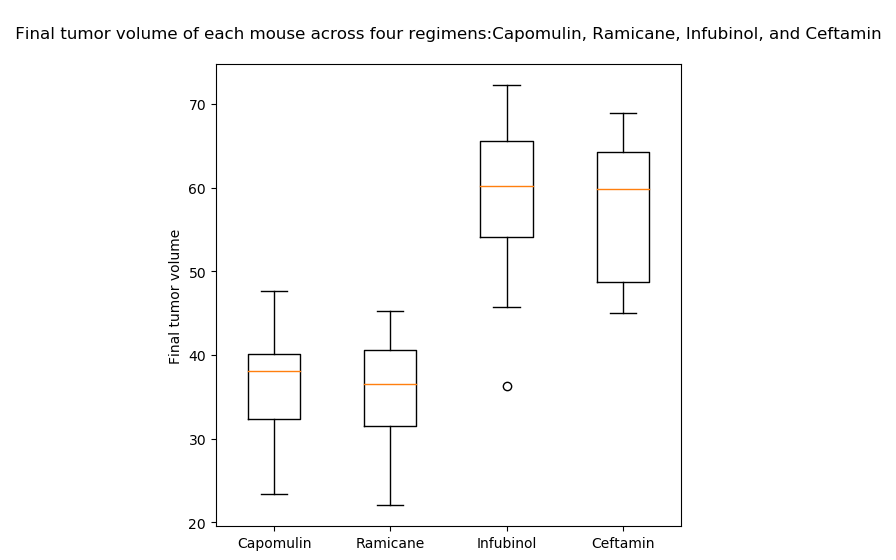

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

listOfRegimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


Capomulin = max_subset_df.loc[max_subset_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
Ramicane = max_subset_df.loc[max_subset_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
Infubinol = max_subset_df.loc[max_subset_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
Ceftamin = max_subset_df.loc[max_subset_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

plt.style.use('default')

plt.figure(figsize=(6,6))

labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.boxplot([Capomulin, Ramicane, Infubinol,Ceftamin], labels=labels)

plt.title('\n Final tumor volume of each mouse across four regimens:Capomulin, Ramicane, Infubinol, and Ceftamin \n')



plt.ylabel('Final tumor volume')

plt.show()


## Line and Scatter Plots

What is the Mouse ID? l509


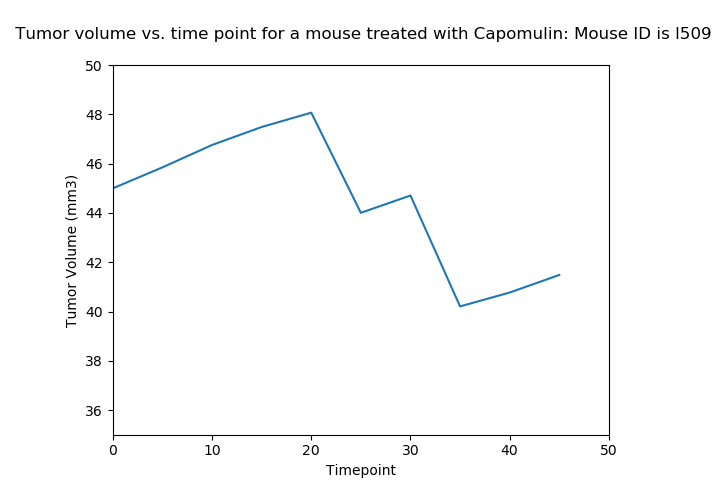

In [222]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']

mouseID = input("What is the Mouse ID? ")

a_mouse_data = Capomulin_df.loc[Capomulin["Mouse ID"]== mouseID]

plt.xlim([0,50])
plt.ylim([35,50])
plt.plot( a_mouse_data["Timepoint"], a_mouse_data["Tumor Volume (mm3)"])

plt.title('\n Tumor volume vs. time point for a mouse treated with Capomulin: Mouse ID is '+str(mouseID)+'\n')

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

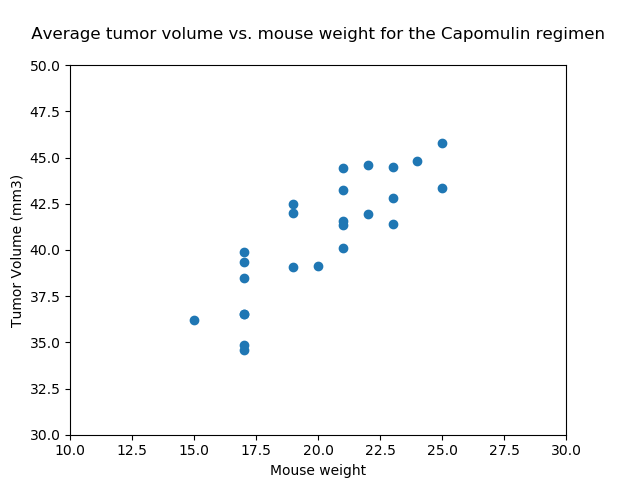

In [215]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Capomulin.head()
avg_capomulin_df =\
    Capomulin_df.groupby("Mouse ID").agg(
        mouse_weight = ("Weight (g)", 'mean'),
        tumor_vol = ("Tumor Volume (mm3)", 'mean'))
  
plt.scatter(avg_capomulin_df['mouse_weight'], avg_capomulin_df['tumor_vol'])
plt.xlim([10,30])
plt.ylim([30,50])
plt.title('\n Average tumor volume vs. mouse weight for the Capomulin regimen \n')
plt.xlabel('Mouse weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

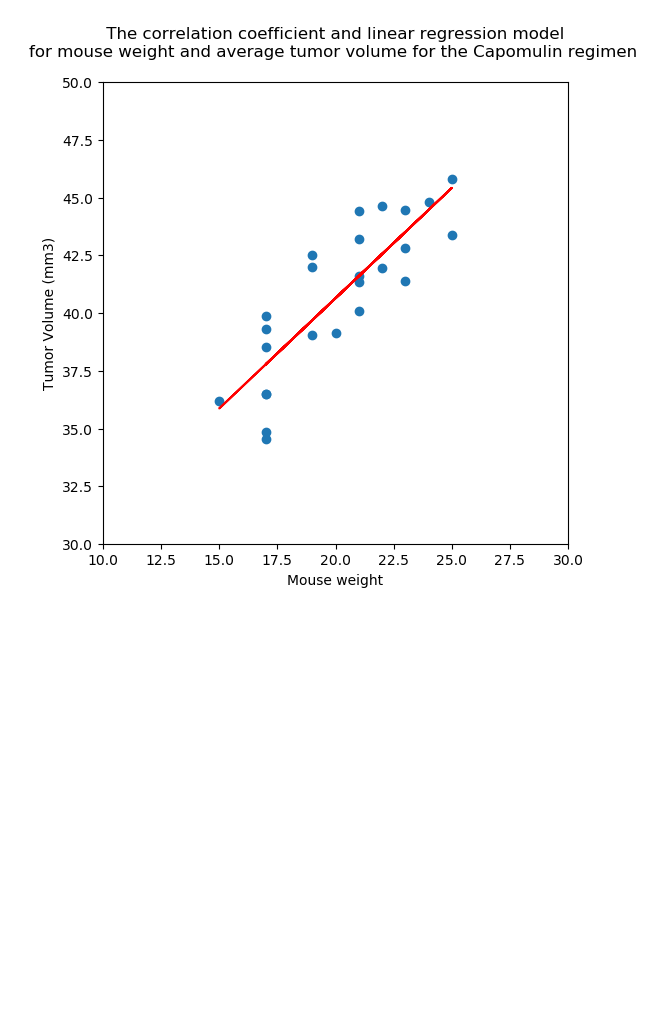

In [221]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the linear regression equation and line to plot
x_values = avg_capomulin_df['mouse_weight']

y_values = avg_capomulin_df['tumor_vol']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.style.use('default')

plt.figure(figsize=(6,6))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.xlim([10,30])
plt.ylim([30,50])

plt.title('\n The correlation coefficient and linear regression model \n'
            'for mouse weight and average tumor volume for the Capomulin regimen \n')

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Mouse weight')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
